<a href="https://colab.research.google.com/github/carlosjimenez88M/batman_peacemaker_recognition/blob/master/Object_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objetivo : Reconocer muñecos a través de imagenes

In [1]:
import glob
import os
import re
import cv2
import tensorflow as tf
from tensorflow import keras 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as stl
from sklearn.model_selection import train_test_split
from google.colab import drive
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from PIL import Image
from google.colab import files
import cv2 
import common 
import numpy as np 
from skimage.transform import resize
%matplotlib inline 
from matplotlib import pyplot as plt 
import pylab 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) 
import warnings
warnings.filterwarnings('ignore')

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
images_path = '/content/drive/MyDrive/images/train'

In [4]:
train_batman = os.path.join(images_path,'batman')
train_peacemaker = os.path.join(images_path,'peacemaker')
train_batman_fnames = os.listdir(train_batman)
train_peacemaker_fnames = os.listdir(train_peacemaker)

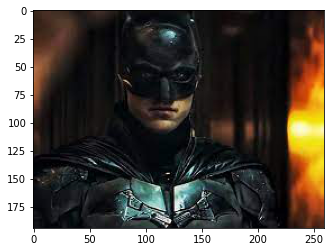

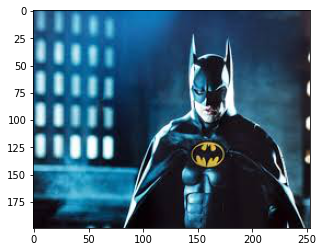

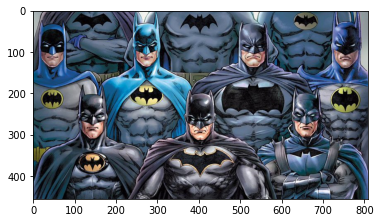

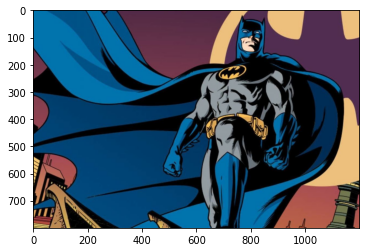

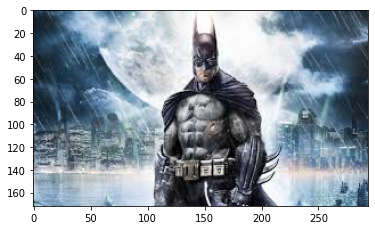

In [73]:
for i in os.listdir(train_batman)[:5]:
  img = image.load_img(train_batman+'//'+i)
  plt.imshow(img)
  plt.show()

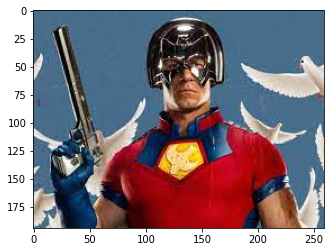

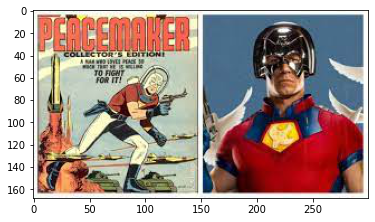

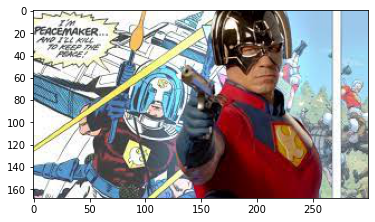

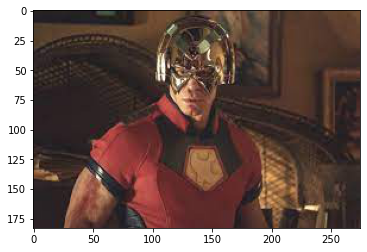

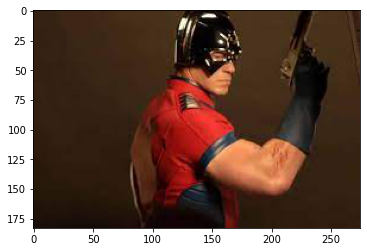

In [74]:
for i in os.listdir(train_peacemaker)[:5]:
  img = image.load_img(train_peacemaker+'//'+i)
  plt.imshow(img)
  plt.show()

In [5]:
print('Total images in Batam',len(train_batman_fnames))
print('Total images in Batam',len(train_peacemaker_fnames))

Total images in Batam 28
Total images in Batam 29


In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16,(3,3),activation='relu', input_shape=(150,150,3)),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])

In [7]:
model.compile(optimizer=Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
img_height = 150
img_width = 150
batch_size= 10
train_data_gen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip= True,
    validation_split=0.2
)

In [9]:
train_generator = train_data_gen.flow_from_directory(
    images_path,
    target_size = (img_height,img_width),
    batch_size=batch_size, 
    class_mode = 'binary',
    subset='training'
)

validation_generator = train_data_gen.flow_from_directory(
    images_path,
    target_size = (img_height,img_width),
    batch_size=batch_size, 
    class_mode = 'binary',
    subset='validation'
    
)

Found 47 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [10]:
train_generator.class_indices

{'batman': 0, 'peacemaker': 1}

In [11]:
epochs = 20
history = model.fit_generator(
    train_generator,
    steps_per_epoch= train_generator.samples//batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples//batch_size,
    epochs = epochs
)

Epoch 1/20
4/4 [==============================] - 4s 784ms/step - loss: 2.8663 - accuracy: 0.5676 - val_loss: 1.3776 - val_accuracy: 0.5000
Epoch 2/20
4/4 [==============================] - 3s 689ms/step - loss: 1.0116 - accuracy: 0.4865 - val_loss: 0.6682 - val_accuracy: 0.6000
Epoch 3/20
4/4 [==============================] - 3s 563ms/step - loss: 0.6735 - accuracy: 0.4865 - val_loss: 0.6756 - val_accuracy: 0.5000
Epoch 4/20
4/4 [==============================] - 4s 1s/step - loss: 0.6513 - accuracy: 0.5135 - val_loss: 0.5837 - val_accuracy: 0.9000
Epoch 5/20
4/4 [==============================] - 3s 682ms/step - loss: 0.5646 - accuracy: 0.7838 - val_loss: 0.4508 - val_accuracy: 0.9000
Epoch 6/20
4/4 [==============================] - 3s 710ms/step - loss: 0.5159 - accuracy: 0.7568 - val_loss: 0.3128 - val_accuracy: 0.9000
Epoch 7/20
4/4 [==============================] - 3s 784ms/step - loss: 0.3319 - accuracy: 0.8378 - val_loss: 0.2734 - val_accuracy: 0.9000
Epoch 8/20
4/4 [=======

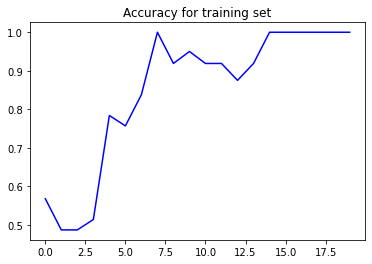

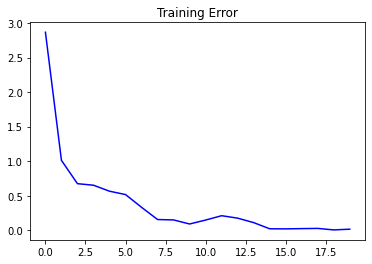

In [12]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))

plt.plot(epochs,acc,'b',label='Train accuracy')
plt.title('Accuracy for training set')
plt.figure()
plt.plot(epochs,loss,'b',label='Error')
plt.title('Training Error')
plt.show()

## Model Testing

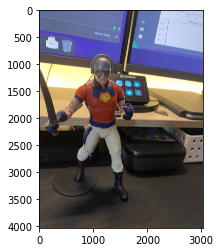

Is Peacemaker


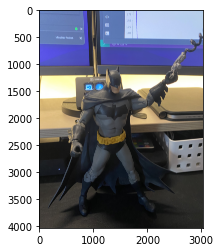

Is Batman


In [45]:
test_path = '/content/drive/MyDrive/images/test'
for i in os.listdir(test_path):
  img = image.load_img(test_path+'//'+i)
  plt.imshow(img)
  plt.show()
  X = image.img_to_array(img)
  X_2 = resize(X,(150,150,3))
  images = np.vstack([X_2])
  val = model.predict(np.array([images]))
  if val == 0:
    print('Is Batman')
  else:
    print('Is Peacemaker')
  
  
 
 